In [40]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
import seaborn as sns

In [41]:
train_data=pd.read_csv('/kaggle/input/anyas-gojo-revival/sheet1.csv')
train_data.pop('id')
train_data.pop('a')
train_data['v']=train_data['v'].apply(lambda x:int(x.split(":")[2])+int(x.split(":")[1])*60+int(x.split(":")[0])*3600)
train_target=train_data['target']
train_data.pop('target')

0       5.785
1       0.826
2       1.201
3       0.963
4      59.635
       ...   
64    125.014
65    317.818
66    397.066
67      6.017
68    107.846
Name: target, Length: 69, dtype: float64

<Axes: >

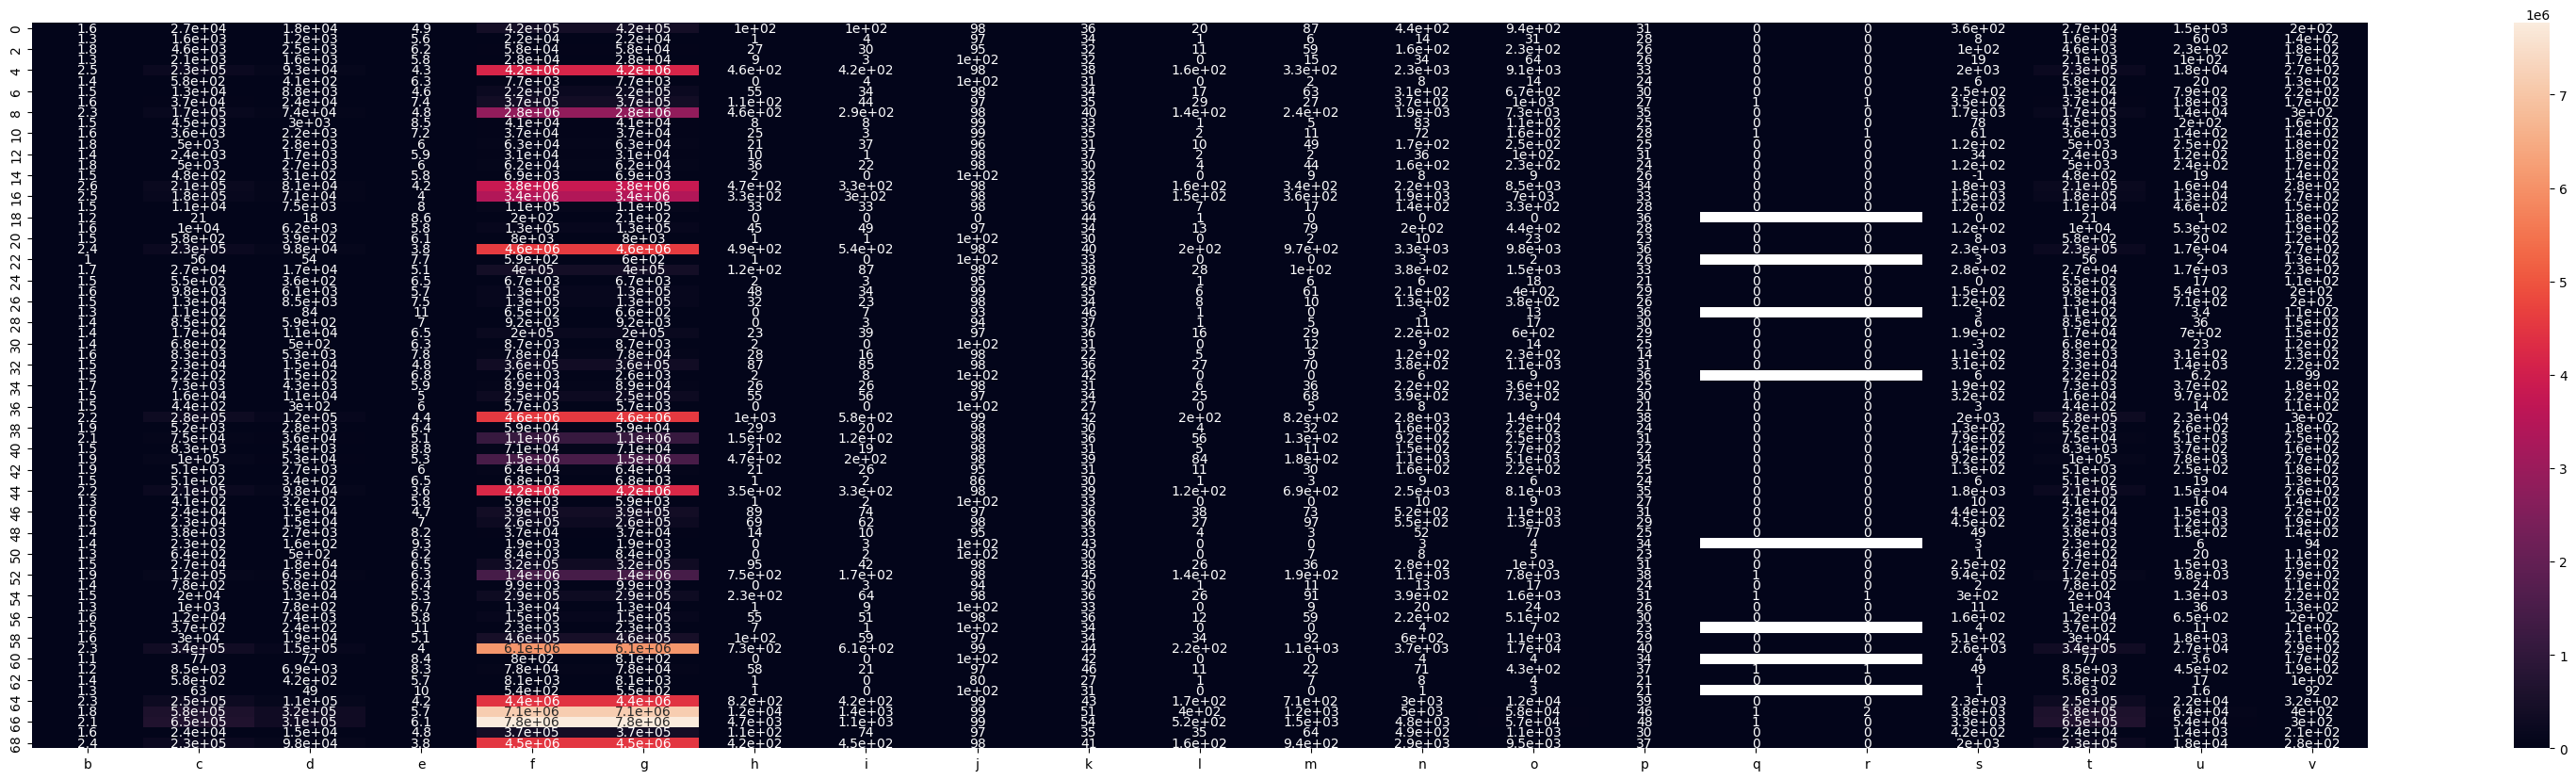

In [42]:
plt.figure(figsize=(40,10))
sns.heatmap(data=train_data, annot=True)

In [43]:
train_data.isnull().sum()

b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
j    0
k    0
l    0
m    0
n    0
o    0
p    0
q    8
r    8
s    0
t    0
u    0
v    0
dtype: int64

In [44]:
train_data=train_data.interpolate(method='linear',limit_direction='forward')

In [ ]:
xgb =  GradientBoostingRegressor(random_state=0)
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of trees
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 3, 4],
#     'min_samples_leaf': [1, 2, 3]
# }
catboost=CatBoostRegressor()
param_grid = {
    'iterations': [100, 200, 300],  # Number of boosting iterations
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'depth': [4, 6, 8],  # Depth of the trees
    'l2_leaf_reg': [3, 5, 7],  # L2 regularization strength
    # Add other hyperparameters you want to tune
}
grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid,cv=5)
grid_search.fit(train_data, train_target)

0:	learn: 72.4905725	total: 53.2ms	remaining: 5.26s
1:	learn: 72.2009962	total: 53.9ms	remaining: 2.64s
2:	learn: 71.8810933	total: 54.2ms	remaining: 1.75s
3:	learn: 71.5826514	total: 54.5ms	remaining: 1.31s
4:	learn: 71.2544190	total: 54.8ms	remaining: 1.04s
5:	learn: 70.9237637	total: 55.2ms	remaining: 864ms
6:	learn: 70.5995600	total: 55.5ms	remaining: 737ms
7:	learn: 70.2949968	total: 55.8ms	remaining: 642ms
8:	learn: 69.9643472	total: 56.1ms	remaining: 567ms
9:	learn: 69.6672766	total: 56.4ms	remaining: 508ms
10:	learn: 69.3479783	total: 56.7ms	remaining: 459ms
11:	learn: 69.0213951	total: 57.1ms	remaining: 418ms
12:	learn: 68.7317662	total: 57.3ms	remaining: 384ms
13:	learn: 68.4209879	total: 57.7ms	remaining: 354ms
14:	learn: 68.1351133	total: 58ms	remaining: 329ms
15:	learn: 67.8951929	total: 58.3ms	remaining: 306ms
16:	learn: 67.6326633	total: 58.6ms	remaining: 286ms
17:	learn: 67.3259634	total: 58.9ms	remaining: 269ms
18:	learn: 67.0213939	total: 59.3ms	remaining: 253ms
19:	l

In [49]:
test_data=pd.read_csv('/kaggle/input/anyas-gojo-revival/sheet2.csv')
test_data.pop('id')
test_data.pop('a')
test_data['v']=test_data['v'].apply(lambda x:int(x.split(":")[2])+int(x.split(":")[1])*60+int(x.split(":")[0])*3600)
test_data=test_data.interpolate(method='linear',limit_direction='forward')
arr=grid_search.predict(test_data)
print(arr)


[4.25560242 9.18947432 1.95737219 ... 8.89015079 2.59664161 2.13686914]


In [50]:
len(arr)

1064

In [55]:
submission = pd.DataFrame({'Id': range(1,len(arr)+1), 'target': arr})
print(submission)
submission.to_csv('submission1.csv', index=False)

        Id     target
0        1   4.255602
1        2   9.189474
2        3   1.957372
3        4   0.172035
4        5   6.254521
...    ...        ...
1059  1060  -0.262919
1060  1061  12.909653
1061  1062   8.890151
1062  1063   2.596642
1063  1064   2.136869

[1064 rows x 2 columns]
